In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from scipy import stats

import pprint

### read data, calculate average z_score for both CH/EN

In [2]:
df = pd.read_csv("pol600withLabel.csv", index_col=2)

In [3]:
buf = df.loc[:,"CH1_zscore":"CH21_zscore"]
mean = buf.mean(axis=1)
buf = df.loc[:, ["Request"]]

# n, _ = buf.shape
# for i in range(n):
#     buf.loc[i, "Request"] = buf.loc[i, "Request"].strip()

buf["ch_mean"] = mean
buf["en_mean"] = df.loc[:,"EN1_zscore":"EN31_zscore"].mean(axis=1)
print(buf.loc[:10,:])

df = buf
#df.to_csv("req_zscore_mean_ch_en.csv")

                                                 Request   ch_mean   en_mean
Index                                                                       
0      Answered at <url>. Maybe you are not familiar ... -0.058055 -0.521131
1      Btw, ignoring the London stations it looks lik...  0.326522 -0.350218
2      Because Wikipedia is an encylopaedia not a fre... -0.460581 -1.514232
3      "''Images with iconic status or historical imp... -0.397513 -2.005090
4      May I also ask how CheckUser became involved i...  0.781231 -0.107090
5      Good work on the canal junctions! Where approp...  1.630479  1.496258
6               What is a wall these days? 10 sentences? -0.058490 -0.816986
7      I see a "remove protection" tab on the <url>, ...  0.609943  0.182759
8      Why delete the page <url> with no explanation,... -0.722377 -1.482160
9      Thanks a ton for looking that up for me. For t...  0.861438  1.544496
10                                 Is this okay? Or OTT? -0.268650  0.121253

### define features

#### strategies

In [4]:
import json
import pprint
with open("zscore_sort_in_strategies.json") as fin:
    j = json.load(fin)
strategies = set(j.keys())

In [5]:
n, _ = df.shape
for strategy, reqs in j.items():
    df[strategy] = pd.Series(np.zeros(n), index=df.index)
    for req in reqs:
        Id = req["Index"]
        df.loc[Id, strategy] = 1
#print(df.loc[:20, "1st person"])

In [6]:
columns = {"ch_mean", "en_mean"}

In [7]:
rows = [{c : df[s].corr(df[c]) for c in columns} for s in strategies]
df_corr = pd.DataFrame(rows, index=strategies)

In [8]:
rows = [{c : stats.pearsonr(df[s], df[c])[1] for c in columns} for s in strategies]
df_pval = pd.DataFrame(rows, index=strategies)
print("=== p val of strategies ===")
print(df_pval)

=== p val of strategies ===
                          ch_mean       en_mean
Please start         5.600771e-03  4.679945e-03
INDICATIVE           8.638572e-01  6.654897e-01
HASPOSITIVE          2.191323e-03  1.693133e-02
Please               1.081127e-02  2.195735e-01
1st person           3.474473e-03  3.648209e-02
Hedges               7.873062e-01  2.715871e-01
2nd person           8.820571e-05  9.880088e-02
Apologizing          2.099060e-04  6.376823e-04
Deference            1.485682e-02  2.537776e-05
Indirect (greeting)  6.337603e-04  5.687282e-06
Factuality           1.487440e-01  7.616688e-04
HASNEGATIVE          2.776982e-01  8.965847e-03
Direct question      8.119166e-10  1.404630e-06
Gratitude            1.190931e-11  3.056627e-12
SUBJUNCTIVE          1.202017e-10  2.236501e-01
Direct start         5.205949e-03  3.537144e-03
HASHEDGE             2.483108e-01  4.933288e-01
1st person pl.       5.656969e-01  1.981654e-01
1st person start     1.850263e-03  3.657806e-02
2nd person s

In [9]:
print("=== corr of strategies ===")
print(df_corr)

=== corr of strategies ===
                      ch_mean   en_mean
Please start        -0.112970 -0.115319
INDICATIVE           0.007015  0.017686
HASPOSITIVE          0.124817  0.097469
Please               0.103987 -0.050192
1st person           0.119126  0.085408
Hedges               0.011038  0.044954
2nd person           0.159380  0.067453
Apologizing          0.150777  0.139031
Deference            0.099404  0.171019
Indirect (greeting)  0.139099  0.184050
Factuality          -0.059022 -0.137068
HASNEGATIVE         -0.044386 -0.106608
Direct question     -0.247378 -0.195458
Gratitude            0.272170  0.279640
SUBJUNCTIVE          0.258918  0.049752
Direct start        -0.113931 -0.118901
HASHEDGE             0.047203  0.028019
1st person pl.       0.023496  0.052607
1st person start     0.126849  0.085364
2nd person start    -0.066007 -0.028762


In [10]:
df_corr["diff"] = df_corr["ch_mean"] - df_corr["en_mean"]
print(df_corr)

                      ch_mean   en_mean      diff
Please start        -0.112970 -0.115319  0.002349
INDICATIVE           0.007015  0.017686 -0.010671
HASPOSITIVE          0.124817  0.097469  0.027349
Please               0.103987 -0.050192  0.154179
1st person           0.119126  0.085408  0.033718
Hedges               0.011038  0.044954 -0.033917
2nd person           0.159380  0.067453  0.091926
Apologizing          0.150777  0.139031  0.011746
Deference            0.099404  0.171019 -0.071615
Indirect (greeting)  0.139099  0.184050 -0.044950
Factuality          -0.059022 -0.137068  0.078046
HASNEGATIVE         -0.044386 -0.106608  0.062222
Direct question     -0.247378 -0.195458 -0.051920
Gratitude            0.272170  0.279640 -0.007470
SUBJUNCTIVE          0.258918  0.049752  0.209167
Direct start        -0.113931 -0.118901  0.004970
HASHEDGE             0.047203  0.028019  0.019184
1st person pl.       0.023496  0.052607 -0.029111
1st person start     0.126849  0.085364  0.041485


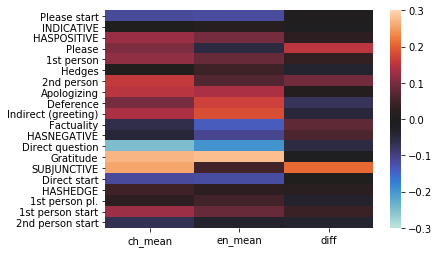

In [11]:
ax = sns.heatmap(df_corr, vmin=-0.3, vmax=0.3, center=0.0)

In [12]:
def add_feature(feature_name, feature_func, df, columns, target_col_name="Request"):
    n, _ = df.shape
    df[feature_name] = pd.Series(np.zeros(n), index=df.index)
    for i in range(n):
        df.loc[i, feature_name] = feature_func(df.loc[i, target_col_name])
    features = [feature_name]
    rows = [{c : df[f].corr(df[c]) for c in columns} for f in features]
    df_corr = pd.DataFrame(rows, index=features)
    rows = [{c : stats.pearsonr(df[f], df[c])[1] for c in columns} for f in features]
    df_pval = pd.DataFrame(rows, index=features)
    return df_corr, df_pval

def draw_heatmap(corrs, vmin=-0.3, vmax=0.3, center=0.0, label="corrs"):
    print("=== heatmap of corrs ===")
    df_corr = pd.concat(corrs.values())
    ax = sns.heatmap(df_corr, vmin=vmin, vmax=vmax, center=center)
    
def print_dfs(dfs):
    temp = pd.concat(dfs.values())
    print(temp)

In [13]:
columns = {"ch_mean", "en_mean"}
corrs = {}
pvals = {}

for each request, count capital letter number

In [14]:
count_capital = lambda s : reduce(lambda x,y : x+y, map(lambda c : 1 if c.isupper() else 0, s))
feature_name = "capital_cnt"

corr, pval = add_feature(feature_name, count_capital, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

#draw_heatmap(corrs)

=== corr result ===
              ch_mean   en_mean
capital_cnt -0.008267  0.024804
=== pval result ===
              ch_mean   en_mean
capital_cnt  0.839847  0.544255


for each request, count non-alphabetic symbol number

In [15]:
count_non_letter = lambda s : reduce(lambda x,y : x+y, map(lambda c : 0 if c.isalpha() else 1, s))
feature_name = "non_letter_cnt"
corr, pval = add_feature(feature_name, count_non_letter, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

#draw_heatmap(corrs)

=== corr result ===
                 ch_mean   en_mean
capital_cnt    -0.008267  0.024804
non_letter_cnt  0.109912  0.013395
=== pval result ===
                 ch_mean   en_mean
capital_cnt     0.839847  0.544255
non_letter_cnt  0.007042  0.743334


for each request, count its total length

=== corr result ===
                 ch_mean   en_mean
capital_cnt    -0.008267  0.024804
non_letter_cnt  0.109912  0.013395
non_letter_cnt  0.109912  0.013395
=== pval result ===
                 ch_mean   en_mean
capital_cnt     0.839847  0.544255
non_letter_cnt  0.007042  0.743334
non_letter_cnt  0.007042  0.743334
=== heatmap of corrs ===


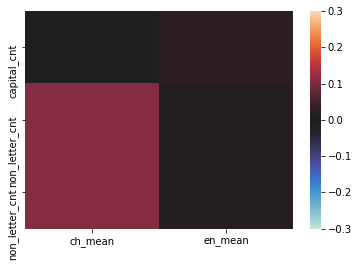

In [16]:
length_of_request = lambda s : len(s)
feature_name = "request_len"
corr_pval = add_feature(feature_name, length_of_request, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each request, count question mark number

=== corr result ===
                    ch_mean   en_mean
capital_cnt       -0.008267  0.024804
non_letter_cnt     0.109912  0.013395
non_letter_cnt     0.109912  0.013395
question_mark_cnt -0.254604 -0.228344
=== pval result ===
                        ch_mean       en_mean
capital_cnt        8.398471e-01  5.442551e-01
non_letter_cnt     7.042104e-03  7.433338e-01
non_letter_cnt     7.042104e-03  7.433338e-01
question_mark_cnt  2.482373e-10  1.544889e-08
=== heatmap of corrs ===


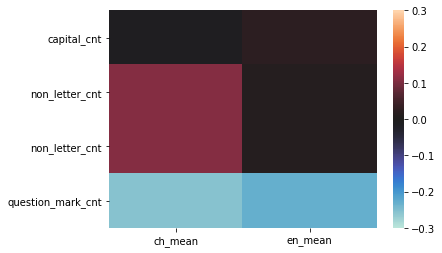

In [17]:
count_question_mark = lambda s : reduce(lambda x,y : x+y, map(lambda c : 1 if c == "?" else 0, s))
feature_name = "question_mark_cnt"
corr, pval = add_feature(feature_name, count_question_mark, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each feature, count exclamation mark number

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_cnt  2.572294e-03  3.276411e-03
=== heatmap of corrs ===


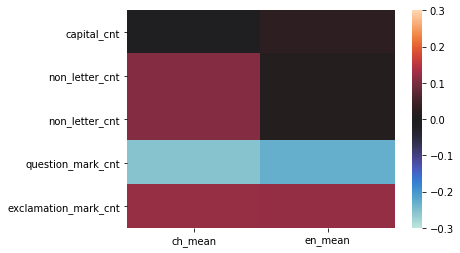

In [18]:
count_exclamation_mark = lambda s : reduce(lambda x,y : x+y, map(lambda c : 1 if c == "!" else 0, s))
feature_name = "exclamation_mark_cnt"
corr, pval = add_feature(feature_name, count_exclamation_mark, df, columns, target_col_name="Request")


corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each feature, count "question_mark_number / length_of_request"

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_cnt  2.572294e-03  3.276411e-03
question_mark_ratio   4.018787e-08  3.811073e-06
=== heatmap of corrs ===


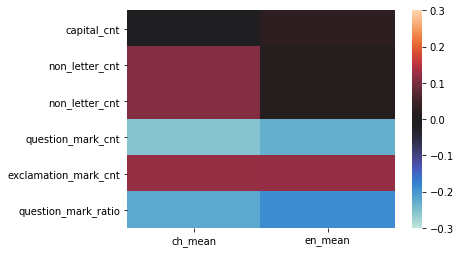

In [19]:
ratio_question_mark = lambda s : reduce(lambda x,y : x+y, map(lambda c : 1 if c == "?" else 0, s)) / len(s)
feature_name = "question_mark_ratio"
corr, pval = add_feature(feature_name, ratio_question_mark, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each request, count average word length

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
average_word_length   0.018289 -0.055312
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_cnt  2.572294e-03  3.276411e-03
question_mark_ratio   4.018787e-08  3.811073e-06
average_word_length   6.548050e-01  1.760323e-01
=== heatmap of corrs ===


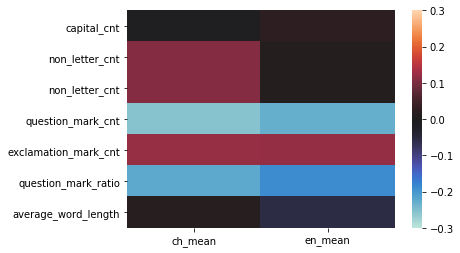

In [20]:
from nltk.tokenize import RegexpTokenizer

#tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

#average_word_length = lambda s : reduce(lambda x,y : x+y, map(lambda w : len(w), tokenizer.tokenize(s))) / len(s)
def average_word_length(s):
    tokenizer = RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(s)
    total_len = reduce(lambda x,y : x+y, map(lambda word : len(word), words))
    return total_len / len(words)

feature_name = "average_word_length"
corr, pval = add_feature(feature_name, average_word_length, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each request count vowel (contiguous vowel seq) number

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
average_word_length   0.018289 -0.055312
vowel_cnt             0.118358 -0.010174
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_cnt  2.572294e-03  3.276411e-03
question_mark_ratio   4.018787e-08  3.811073e-06
average_word_length   6.548050e-01  1.760323e-01
vowel_cnt             3.692068e-03  8.035874e-01
=== heatmap of corrs ===


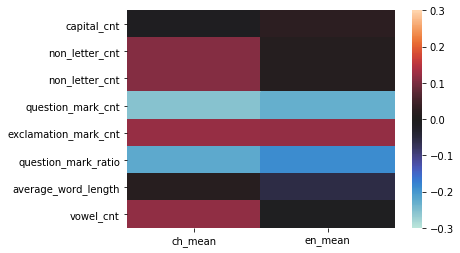

In [21]:
from nltk.tokenize import RegexpTokenizer

#tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

tokenizer = RegexpTokenizer(r"[aeiou]+")
count_vowel = lambda s : len(tokenizer.tokenize(s))

feature_name = "vowel_cnt"
corr, pval = add_feature(feature_name, count_vowel, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each request, count average vowel (contiguous vowel seq) number per word

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
average_word_length   0.018289 -0.055312
vowel_cnt             0.118358 -0.010174
vowel_per_word        0.089803 -0.001509
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_cnt  2.572294e-03  3.276411e-03
question_mark_ratio   4.018787e-08  3.811073e-06
average_word_length   6.548050e-01  1.760323e-01
vowel_cnt             3.692068e-03  8.035874e-01
vowel_per_word        2.783688e-02  9.705738e-01
=== heatmap of corrs ===


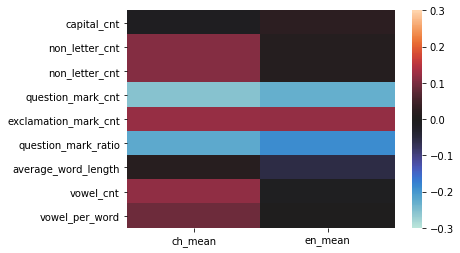

In [22]:
from nltk.tokenize import RegexpTokenizer

#tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

vowel_tokenizer = RegexpTokenizer(r"[aeiou]+")
word_tokenizer = RegexpTokenizer(r"\w+")
def vowel_per_word(s):
    total_vowel = len(vowel_tokenizer.tokenize(s))
    total_word = len(word_tokenizer.tokenize(s))
    return total_vowel / total_word

feature_name = "vowel_per_word"
corr, pval = add_feature(feature_name, vowel_per_word, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each request, count average word per sentence

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
average_word_length   0.018289 -0.055312
vowel_cnt             0.118358 -0.010174
vowel_per_word        0.089803 -0.001509
word_per_sent         0.127800  0.015539
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_cnt  2.572294e-03  3.276411e-03
question_mark_ratio   4.018787e-08  3.811073e-06
average_word_length   6.548050e-01  1.760323e-01
vowel_cnt             3.692068e-03  8.035874e-01
vowel_per_word        2.783688e-02  9.705738e-01
word_per_sent      

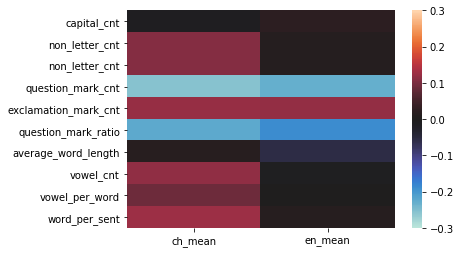

In [23]:
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize

#tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

word_tokenizer = RegexpTokenizer(r"\w+")
def word_per_sent(s):
    total_word = len(word_tokenizer.tokenize(s))
    total_sent = len(sent_tokenize(s))
    return total_word / total_sent

feature_name = "word_per_sent"
corr, pval = add_feature(feature_name, word_per_sent, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each request, count average capital letter number per sentence

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
average_word_length   0.018289 -0.055312
vowel_cnt             0.118358 -0.010174
vowel_per_word        0.089803 -0.001509
word_per_sent         0.127800  0.015539
capital_per_sent     -0.007866  0.030596
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_cnt  2.572294e-03  3.276411e-03
question_mark_ratio   4.018787e-08  3.811073e-06
average_word_length   6.548050e-01  1.760323e-01
vowel_cnt             3.692068e-03  8.035874e-01
vowel_per_word        2.783

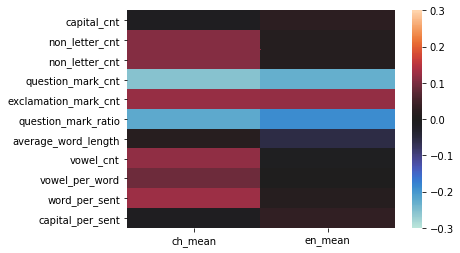

In [24]:
from nltk import sent_tokenize

def capital_per_sent(s):
    total_capital = reduce(lambda x,y : x+y, map(lambda c : 1 if c.isupper() else 0, s))
    total_sent = len(sent_tokenize(s))
    return total_capital / total_sent

feature_name = "capital_per_sent"
corr, pval = add_feature(feature_name, capital_per_sent, df, columns, target_col_name="Request")

corrs[feature_name] = corr
pvals[feature_name] = pval
print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

draw_heatmap(corrs)

for each request, count each vowel per sentence

=== corr result ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
average_word_length   0.018289 -0.055312
vowel_cnt             0.118358 -0.010174
vowel_per_word        0.089803 -0.001509
word_per_sent         0.127800  0.015539
capital_per_sent     -0.007866  0.030596
a_per_word           -0.093005 -0.095616
e_per_word            0.093226  0.034098
i_per_word           -0.013546 -0.087256
o_per_word            0.147744  0.092550
u_per_word            0.125126  0.096088
=== pval result ===
                           ch_mean       en_mean
capital_cnt           8.398471e-01  5.442551e-01
non_letter_cnt        7.042104e-03  7.433338e-01
non_letter_cnt        7.042104e-03  7.433338e-01
question_mark_cnt     2.482373e-10  1.544889e-08
exclamation_mark_c

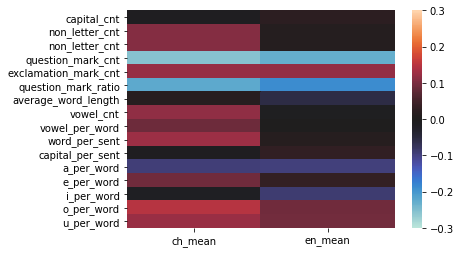

In [25]:
from nltk.tokenize import RegexpTokenizer


word_tokenizer = RegexpTokenizer(r"\w+")

vowels = "aeiou"

funcs = {}

for v in vowels:
    funcs[v] = lambda s : s.count(v) / len(word_tokenizer.tokenize(s))
    feature_name = f"{v}_per_word"
    corr, pval = add_feature(feature_name, funcs[v], df, columns, target_col_name="Request")
    
    corrs[feature_name] = corr
    pvals[feature_name] = pval


print("=== corr result ===")
print_dfs(corrs)
print("=== pval result ===")
print_dfs(pvals)

    
draw_heatmap(corrs)

=== heatmap of corrs ===
                       ch_mean   en_mean
capital_cnt          -0.008267  0.024804
non_letter_cnt        0.109912  0.013395
non_letter_cnt        0.109912  0.013395
question_mark_cnt    -0.254604 -0.228344
exclamation_mark_cnt  0.122864  0.119864
question_mark_ratio  -0.221794 -0.187386
average_word_length   0.018289 -0.055312
vowel_cnt             0.118358 -0.010174
vowel_per_word        0.089803 -0.001509
word_per_sent         0.127800  0.015539
capital_per_sent     -0.007866  0.030596
a_per_word           -0.093005 -0.095616
e_per_word            0.093226  0.034098
i_per_word           -0.013546 -0.087256
o_per_word            0.147744  0.092550
u_per_word            0.125126  0.096088


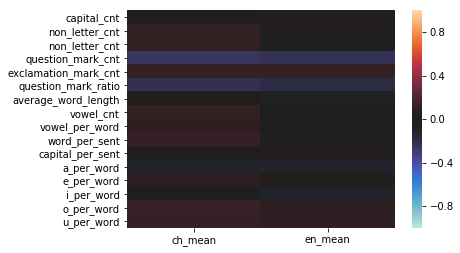

In [26]:
draw_heatmap(corrs, vmin=-1, vmax=1)
print(pd.concat(corrs.values()))

------
depricated:

In [29]:
from functools import reduce

count_capital = lambda s : reduce(lambda x,y : x+y, map(lambda c : 1 if c.isupper() else 0, s))

n, _ = df.shape
feature_name = "capital_cnt"
df[feature_name] = pd.Series(np.zeros(n), index=df.index)
for i in range(n):
    df.loc[i, feature_name] = count_capital(df.loc[i, "Request"])

#print(df.loc[:20, feature_name])

features = [feature_name]
columns = {"ch_mean", "en_mean"}
rows = [{c : df[f].corr(df[c]) for c in columns} for f in features]
df_corr = pd.DataFrame(rows, index=features)
print(df_corr)
#ax = sns.heatmap(df_corr, vmin=-0.3, vmax=0.3, center=0.0)

              ch_mean   en_mean
capital_cnt -0.008267  0.024804


In [30]:
pprint.pprint(j)

{'1st person': [{'Index': 4,
                 'Num': 5,
                 'Request': 'May I also ask how CheckUser became involved in '
                            'the matter? To justify such a use of computer '
                            'records, surely someone needs to invoke a due '
                            'process of some kind for the action to be '
                            'justified?',
                 'ch_mean': 0.7812305688858032,
                 'en_mean': -0.10708987712860107},
                {'Index': 11,
                 'Num': 12,
                 'Request': 'Hi, <name>, I was just wondering why you did '
                            "<url>. If in your opinion that text shouldn't be "
                            'there, why not just delete it completely?',
                 'ch_mean': 0.0007516741752624512,
                 'en_mean': -0.25934743881225586},
                {'Index': 15,
                 'Num': 16,
                 'Request': 'Hey <name> I have a q

                 'Request': 'Another thing, I been working on trying to '
                            'improve the SVG graphics at the Commons. Except '
                            'for the white color background, does everything '
                            'else at <url> look decent?',
                 'ch_mean': 0.3386901021003723,
                 'en_mean': 0.22966617345809937},
                {'Index': 215,
                 'Num': 216,
                 'Request': "<name>, since you're the uninvolved admin here, "
                            'can you just block this <url>? Or do I have to '
                            'report him to Adimistrator noticeboard?',
                 'ch_mean': -0.104281947016716,
                 'en_mean': -0.7223783135414124},
                {'Index': 218,
                 'Num': 219,
                 'Request': 'Well, if Mattisse has caused me to CU innocent '
                            "editors, then it's time for her to be blocked "
           

                 'en_mean': -0.4217988848686218},
                {'Index': 352,
                 'Num': 1053,
                 'Request': 'I did notice that some articles linked to the '
                            'ones I worked on are now missing, which leaves a '
                            "link hanging.  If you're going to delete "
                            "articles, shouldn't someone clean up these broken "
                            'links?',
                 'ch_mean': -0.4348796010017395,
                 'en_mean': -0.6406193971633911},
                {'Index': 353,
                 'Num': 1054,
                 'Request': 'Hi, just returned from a longer vacation where I '
                            'was 100% offline and can look at it soon if it is '
                            'not too late. What is the deadline?',
                 'ch_mean': 0.6514680981636047,
                 'en_mean': 0.3543524444103241},
                {'Index': 357,
                 'Num': 1

                 'Request': "GorillaWarfare- I don't know if you saw my reply "
                            'on my talk page. Are you interested in being my '
                            "mentor for the GU De-Ba'athification article?",
                 'ch_mean': 0.4635472893714905,
                 'en_mean': 0.1059257835149765},
                {'Index': 518,
                 'Num': 1219,
                 'Request': 'Hi GW.. I was a bit bored today, so I made this: '
                            "'url'.. What do you think so far?",
                 'ch_mean': 0.4090985357761383,
                 'en_mean': 0.42912015318870544},
                {'Index': 522,
                 'Num': 1223,
                 'Request': 'So do I, because, inspite of my 100s of friends '
                            "and supporters, I'm feeling a little beleaguered "
                            "and lonely here. If I can hang on in here, can't "
                            'you at least keep me company?',
  

                                'are working on? or was this a general issue?',
                     'ch_mean': -0.5796579718589783,
                     'en_mean': 0.1595572978258133},
                    {'Index': 295,
                     'Num': 296,
                     'Request': '- millions of people are using it to get help '
                                "our service is free of charge. Since it's a "
                                "tech support site you can't claim that it's "
                                'not related to the article either (if you '
                                'disagree with that just google for "consumer '
                                'electronics tech support" see who comes '
                                'first).We are here to server the community - '
                                'why do you find it so offensive?',
                     'ch_mean': -0.9520398378372192,
                     'en_mean': -0.9470991492271423},
                    

                       'Request': 'There seems to have been something wrong '
                                  'with the pages you made on the V8 Supercar '
                                  'Championship Series - a glitch with the '
                                  '"align" tags in the beginning infobox made '
                                  'the text grotesquely overflow the margins. '
                                  "I've trimmed these down; mind checking my "
                                  'work?',
                       'ch_mean': 0.3843766152858734,
                       'en_mean': 0.5682870745658875},
                      {'Index': 110,
                       'Num': 111,
                       'Request': 'I tried to fix your problem with <url>. Is '
                                  'that what you were looking for?',
                       'ch_mean': -0.02532215043902397,
                       'en_mean': 0.15274128317832947},
                      {'Index': 111,
    

                       'ch_mean': 0.1058572456240654,
                       'en_mean': 0.1600157767534256},
                      {'Index': 313,
                       'Num': 1014,
                       'Request': 'Like most users with their articles screwed '
                                  "over by 'url''s new web facelift, I'm at a "
                                  "lost with 'url' being dead. Can you help?",
                       'ch_mean': -0.023658424615859985,
                       'en_mean': 0.10092545300722122},
                      {'Index': 319,
                       'Num': 1020,
                       'Request': 'I noticed that you have a little note at '
                                  'the top saying your status. How do you do '
                                  'that?',
                       'ch_mean': -0.10004881769418716,
                       'en_mean': 0.25038790702819824},
                      {'Index': 320,
                       'Num': 1021,
       

                       'en_mean': 0.7090617418289185},
                      {'Index': 448,
                       'Num': 1149,
                       'Request': 'I replied... also, are you watching that '
                                  'page?  If so, I will stop bothering you '
                                  'here?',
                       'ch_mean': -0.19337764382362366,
                       'en_mean': -0.5273388624191284},
                      {'Index': 450,
                       'Num': 1151,
                       'Request': "Hmmm, Dev, Jet123's nom doesn't really "
                                  'count as your second one, right? I can '
                                  'overwrite it?',
                       'ch_mean': -0.5526239275932312,
                       'en_mean': -0.11855033785104752},
                      {'Index': 451,
                       'Num': 1152,
                       'Request': "I have also put speedy delete tags on 'url' "
                    

                            'fine editing style and hope you come back '
                            'sometime -- keep looking in on us now and then, '
                            'at least?',
                 'ch_mean': 1.1196718215942383,
                 'en_mean': 0.9417957067489624},
                {'Index': 41,
                 'Num': 42,
                 'Request': 'Could you please explain to me what the buttons '
                            'do? How do you "Not accept" a change, that\'s '
                            "what...you revert it, don't you...?",
                 'ch_mean': 0.25832319259643555,
                 'en_mean': 0.336414098739624},
                {'Index': 43,
                 'Num': 44,
                 'Request': "Hi, I've added a question to your Request for "
                            'Adminship. Also, could you elaborate on how you '
                            "will ''prevent'' vandalism?",
                 'ch_mean': 0.15643271803855896,
          

                 'Request': 'The <url> disambiguation page seems to be a model '
                            'for collecting the related entries for IOOF '
                            'buildings in a single place. Do you agree?',
                 'ch_mean': 0.14720241725444794,
                 'en_mean': 0.4430551826953888},
                {'Index': 159,
                 'Num': 160,
                 'Request': "Hi there, I've raised the possibility of "
                            'unprotecting the tamazepam page <url>. What are '
                            'your thoughts?',
                 'ch_mean': 0.2892555296421051,
                 'en_mean': 0.9195277690887451},
                {'Index': 160,
                 'Num': 161,
                 'Request': 'Also, how does that vandalism thing on your page '
                            'work? Do you have to change the count manually, '
                            'or does it detect vandalism itself?',
                 'ch_mean': -0.0

                 'ch_mean': -0.3303956389427185,
                 'en_mean': 1.1111119985580444},
                {'Index': 273,
                 'Num': 274,
                 'Request': 'So it seems we both already know the problems '
                            'with the current logo and the SVG one. What can I '
                            'do to help you?',
                 'ch_mean': 0.48078346252441406,
                 'en_mean': 1.1596542596817017},
                {'Index': 277,
                 'Num': 278,
                 'Request': "That's still not the original source, and after "
                            "searching through a few pages on Flickr, I'm "
                            'assuming the original is all rights reserved '
                            'anyway. Can I ask why you believe it is public '
                            'domain?',
                 'ch_mean': -0.03494963422417641,
                 'en_mean': -0.23587071895599365},
                {'Index': 279,

                {'Index': 380,
                 'Num': 1081,
                 'Request': "I don't know why claim that you reverted "
                            'vandalism (rv edit summary) when to me they '
                            'appeared to be good faith edits. What exactly was '
                            'the vandalism?',
                 'ch_mean': -0.481556236743927,
                 'en_mean': -0.6536383628845215},
                {'Index': 381,
                 'Num': 1082,
                 'Request': "So, now that it's clear there's no moratorium, "
                            "you now think it's controverial?  Can you explain "
                            'why?',
                 'ch_mean': -0.2695666253566742,
                 'en_mean': -0.2709786295890808},
                {'Index': 382,
                 'Num': 1083,
                 'Request': 'These two factors make me think that Indian '
                            'ice-cream is a better name for the article than

                 'en_mean': 0.034917909651994705},
                {'Index': 481,
                 'Num': 1182,
                 'Request': "Welcome to WikiProject Austria. I'm wondering if "
                            "you're willing to coordinate the project for a "
                            'while?',
                 'ch_mean': 1.5974200963974,
                 'en_mean': 0.7814894914627075},
                {'Index': 482,
                 'Num': 1183,
                 'Request': 'You added managerial stats but they state '
                            'Ferguson only managed St.Mirren for 12 games.  '
                            "That's too few given he was there for 4 years, "
                            'please can you fix?',
                 'ch_mean': 0.23387598991394043,
                 'en_mean': 0.17997969686985016},
                {'Index': 483,
                 'Num': 1184,
                 'Request': 'I notice that you are using a very old version of '
                

                            'Canadian one?',
                 'ch_mean': 0.7019051313400269,
                 'en_mean': 0.3422296941280365},
                {'Index': 573,
                 'Num': 1274,
                 'Request': 'Hey, if you took this picture you can release it '
                            'into the public domain. If not, do you know who '
                            'took it?',
                 'ch_mean': 0.03144582360982895,
                 'en_mean': 0.053272705525159836},
                {'Index': 574,
                 'Num': 1275,
                 'Request': "Evidently, I don't have enough consciousness, "
                            "because I haven't the foggiest idea of what "
                            "you're talking about. Could you tell me?",
                 'ch_mean': -0.10697507858276367,
                 'en_mean': -1.26531982421875},
                {'Index': 576,
                 'Num': 1277,
                 'Request': "There's nothing in your h

                  'ch_mean': 0.672247588634491,
                  'en_mean': 0.10061562806367874},
                 {'Index': 563,
                  'Num': 1264,
                  'Request': "I'm sorry, I don't know what article you are "
                             'talking about. Can you please provide the exact '
                             'name?',
                  'ch_mean': 0.05862694978713989,
                  'en_mean': 0.5297277569770813},
                 {'Index': 592,
                  'Num': 1293,
                  'Request': 'Sorry for the slow reply, something I needed to '
                             "take care of. 'url' is restored- if it is "
                             "mentioned in such 'url', could you please 'url' "
                             'them in the article?',
                  'ch_mean': 0.8671335577964783,
                  'en_mean': 0.16087521612644196},
                 {'Index': 599,
                  'Num': 1300,
                  'Request': '

                     {'Index': 273,
                      'Num': 274,
                      'Request': 'So it seems we both already know the '
                                 'problems with the current logo and the SVG '
                                 'one. What can I do to help you?',
                      'ch_mean': 0.48078346252441406,
                      'en_mean': 1.1596542596817017},
                     {'Index': 280,
                      'Num': 281,
                      'Request': '<name> I find this conversation remarkable '
                                 'given that you have twice opted to edit war '
                                 'over referencing format to the detriment of '
                                 "an article's quality in the last 24 hours on "
                                 '<url>. What gives?',
                      'ch_mean': -0.2223396748304367,
                      'en_mean': -1.0631637573242188},
                     {'Index': 296,
            

                   'Request': "'SO!?!?'', what has it got to do with you?",
                   'ch_mean': -1.2641220092773438,
                   'en_mean': -2.3516106605529785},
                  {'Index': 147,
                   'Num': 148,
                   'Request': 'Is Castle Donington an incorporate '
                              'municipality? Or is it just a place name?',
                   'ch_mean': -0.38563159108161926,
                   'en_mean': 0.03757617622613907},
                  {'Index': 162,
                   'Num': 163,
                   'Request': "Why haven't you submitted the diet to Good "
                              'Article? And when are you going for Featured '
                              'Article candidates?',
                   'ch_mean': -1.3446911573410034,
                   'en_mean': -1.113779067993164},
                  {'Index': 176,
                   'Num': 177,
                   'Request': "I don't think I've used it in Wikipedia. S

                 'ch_mean': -0.5685757994651794,
                 'en_mean': -0.4276399612426758},
                {'Index': 331,
                 'Num': 1032,
                 'Request': 'Why are you uploading/changing badge files here? '
                            'Surely you should just upload them to Commons '
                            'then list the wikipedia version for deletion?',
                 'ch_mean': -0.3365299701690674,
                 'en_mean': -1.1530197858810425},
                {'Index': 387,
                 'Num': 1088,
                 'Request': "Third: it's August 31 2010. Please check my "
                            "userpage for reasons why I really don't feel "
                            'useful today. Ask another admin, okay?',
                 'ch_mean': -1.2361911535263062,
                 'en_mean': -1.2676464319229126},
                {'Index': 450,
                 'Num': 1151,
                 'Request': "Hmmm, Dev, Jet123's nom doesn't real

               'Request': 'As a timid Wikipedia end-user who never makes more '
                          'than a rare grammatical or spelling edit, learning '
                          'the history to be found on this talk page and '
                          "Kate's userpage history makes me sad. Why is it "
                          'that so many communities change the way they do as '
                          'the size of the project they revolve around '
                          'increases..?',
               'ch_mean': -0.0040846108458936214,
               'en_mean': 0.07413224875926971},
              {'Index': 93,
               'Num': 94,
               'Request': 'Title says it all.<url> I dont have time to put up '
                          'a page... but might I suggest <url>?',
               'ch_mean': 0.1519550383090973,
               'en_mean': -0.41154026985168457},
              {'Index': 99,
               'Num': 100,
               'Request': 'Again samething wi

               'Num': 289,
               'Request': 'Hmmm, you are basically asking me to think '
                          'positively despite evidence and knowing that over '
                          'this issue none good faith on part of some users '
                          'was showed in past, but ok, letxb4s see how it '
                          'goes. The question then is: do you consider '
                          'including the discussions with outside mediation '
                          'participants that happend on those talk-pages '
                          '(direktor, for exemple, has been very active and '
                          'enthusiastic there lately) or only the in-mediation '
                          'discussions are the ones that count?',
               'ch_mean': -0.17984020709991455,
               'en_mean': -0.6573610305786133},
              {'Index': 289,
               'Num': 290,
               'Request': "Noticed your nice ''<url>'' photograph

               'Num': 1248,
               'Request': 'Also, how does the "revert all edits" function '
                          'work?  Mainly, what do I put in the box for the '
                          'secondary confirmation?',
               'ch_mean': -0.4281860888004303,
               'en_mean': 0.3745659291744232},
              {'Index': 549,
               'Num': 1250,
               'Request': 'Thanks.  Aside from rewrites and creations (which '
                          "I've no mind for), anything in particular you see "
                          'that I should focus on, or is it going okay?',
               'ch_mean': 0.6236577033996582,
               'en_mean': 0.8299309611320496},
              {'Index': 550,
               'Num': 1251,
               'Request': "Reading the guideline again: ''The name of each "
                          'article (a link to the articles is recommended as '
                          "well) in which fair use is claimed for the item''.

                             'here would be seen as obviously deletable '
                             'material by most editors?',
                  'ch_mean': 0.8482381701469421,
                  'en_mean': -1.1385784149169922},
                 {'Index': 168,
                  'Num': 169,
                  'Request': "I still prefer Huxley's version, as I don't "
                             'think that version makes the dying off clear, '
                             'and ignores the r-type organism analogue. Is '
                             'there any way to work more emphasis into the '
                             "dying off part in, as it's absolutely crucial to "
                             'the removal of unfit forms?',
                  'ch_mean': 0.535050630569458,
                  'en_mean': -0.0010401755571365356},
                 {'Index': 177,
                  'Num': 178,
                  'Request': 'Some pictures are not mine, but those that I '
                

                             'images to the left to stop this?',
                  'ch_mean': 0.5992854237556458,
                  'en_mean': -0.013532979413866997},
                 {'Index': 413,
                  'Num': 1114,
                  'Request': 'pls see my comments on your revert on the talk '
                             "page.  Perhaps you'll consider undoing my "
                             'revert?',
                  'ch_mean': 0.6057972311973572,
                  'en_mean': -0.3638635277748108},
                 {'Index': 414,
                  'Num': 1115,
                  'Request': 'Do you mean article edits with sock puppets? '
                             'Could you give me more precise examples?',
                  'ch_mean': 0.7613094449043274,
                  'en_mean': -0.2202785313129425},
                 {'Index': 420,
                  'Num': 1121,
                  'Request': 'Why are capital letters used in the article '
                         

                  'Request': "Ok, I'd agree about <url> being better. Should I "
                             'delete the other one (you could also tag it for '
                             'speedy deletion as a mistake)?',
                  'ch_mean': 0.4852336049079895,
                  'en_mean': 0.18858419358730316},
                 {'Index': 31,
                  'Num': 32,
                  'Request': 'Thanks for your support! Would you consider '
                             'commenting on the <url> talk page, saying it has '
                             'your support (and adding those comments for '
                             'discussion)?',
                  'ch_mean': 0.8229897618293762,
                  'en_mean': 1.54819655418396},
                 {'Index': 32,
                  'Num': 33,
                  'Request': 'Would you like to elaborate? How are you '
                             'empowering me exactly?',
                  'ch_mean': -0.034607551991939545,
 

                  'en_mean': 0.4217536151409149},
                 {'Index': 180,
                  'Num': 181,
                  'Request': 'I was thinking about creating a page about '
                             'Nintendo eShop. And since you are a well trusted '
                             'user I am asking you if you think that would '
                             "just be deleted because there isn't enough "
                             'information?',
                  'ch_mean': 0.6408388018608093,
                  'en_mean': 0.7775205373764038},
                 {'Index': 182,
                  'Num': 183,
                  'Request': 'There is a special tool which shows you page '
                             'sizes? Would you like to know how to use it?',
                  'ch_mean': 0.7055160403251648,
                  'en_mean': 0.15040776133537292},
                 {'Index': 183,
                  'Num': 184,
                  'Request': 'Your <url> is a brilliant id

                  'ch_mean': -0.4348796010017395,
                  'en_mean': -0.6406193971633911},
                 {'Index': 354,
                  'Num': 1055,
                  'Request': "I though it's better like that. Can you revert "
                             'it?',
                  'ch_mean': 0.06721757352352142,
                  'en_mean': -0.17257165908813477},
                 {'Index': 355,
                  'Num': 1056,
                  'Request': "Due to your edits to this template, 'url' is now "
                             'required on all transclusions.  Are you running '
                             'a bot to clean this up?',
                  'ch_mean': -0.3776472806930542,
                  'en_mean': -0.3242502212524414},
                 {'Index': 356,
                  'Num': 1057,
                  'Request': "An article about a craver named 'url' needs some "
                             'work. Can you clean the article up?',
                  'ch_mean

                  'Request': 'This is clearly them being just as congenial and '
                             "accurate as always.'url' What is the appropriate "
                             'place to report them?',
                  'ch_mean': 0.19161680340766907,
                  'en_mean': -0.2007363736629486},
                 {'Index': 539,
                  'Num': 1240,
                  'Request': "As to our last discussion, you said that 'url' "
                             "wasn't comprehensive enough and didn't show "
                             'clearly its goal. Do you have any suggesting to '
                             'improve this template?',
                  'ch_mean': 0.25847920775413513,
                  'en_mean': -0.004536271095275879},
                 {'Index': 540,
                  'Num': 1241,
                  'Request': 'To be perfectly honest, I really have no idea '
                             "what you're talking about.  Would it not be "
          

             'en_mean': 0.22175367176532745},
            {'Index': 248,
             'Num': 249,
             'Request': 'Right, I was demonstrating that one could merge '
                        '<person> with <person>, that option would not appear '
                        'on players that were not Dual players. Did anything '
                        'actually break?',
             'ch_mean': 0.04266802594065666,
             'en_mean': -0.33727380633354187},
            {'Index': 250,
             'Num': 251,
             'Request': 'I can certainly suggest to Isarig that 3RR is not an '
                        'entitlement, and that dicussion is often the better '
                        'approach. Would you like me to try to mediate the '
                        'Karsh page?',
             'ch_mean': 0.6694518327713013,
             'en_mean': 0.49619391560554504},
            {'Index': 257,
             'Num': 258,
             'Request': 'Incidentally, your username seems famil

                 'ch_mean': -0.013611137866973877,
                 'en_mean': 0.2558867633342743},
                {'Index': 348,
                 'Num': 1049,
                 'Request': "Take a look at the most recent post to 'url'. Can "
                            'you make a stub out of it?',
                 'ch_mean': 0.015047572553157806,
                 'en_mean': 0.24832691252231598},
                {'Index': 354,
                 'Num': 1055,
                 'Request': "I though it's better like that. Can you revert "
                            'it?',
                 'ch_mean': 0.06721757352352142,
                 'en_mean': -0.17257165908813477},
                {'Index': 356,
                 'Num': 1057,
                 'Request': "An article about a craver named 'url' needs some "
                            'work. Can you clean the article up?',
                 'ch_mean': -0.11134281009435654,
                 'en_mean': 0.07237499952316284},
                {'

                         {'Index': 305,
                          'Num': 1006,
                          'Request': 'Hello, Jeff79. Would you weigh in on the '
                                     'above linked discussion regarding an '
                                     'edit you made?',
                          'ch_mean': 0.34596094489097595,
                          'en_mean': 0.3873867988586426},
                         {'Index': 316,
                          'Num': 1017,
                          'Request': "Hi, I was wondering why it is that 'url' "
                                     'only has two articles in it -- and '
                                     'whether it should be kept. Has it ever '
                                     'been more fully populated?',
                          'ch_mean': 0.43074870109558105,
                          'en_mean': 0.551295280456543},
                         {'Index': 336,
                          'Num': 1037,
                 

             'en_mean': 0.5297277569770813},
            {'Index': 581,
             'Num': 1282,
             'Request': "So far there are four editors on 'url' who have "
                        'called you on your edit-warring. Would you please '
                        'stop?',
             'ch_mean': -0.919279932975769,
             'en_mean': -1.1983537673950195},
            {'Index': 582,
             'Num': 1283,
             'Request': "If it's not clear, I am asking for a '''quote from "
                        "your source''' which supports the statement which you "
                        'inserted into the article with your reference. Can '
                        'you please supply a quote?',
             'ch_mean': 0.6565868854522705,
             'en_mean': -0.543574333190918},
            {'Index': 592,
             'Num': 1293,
             'Request': 'Sorry for the slow reply, something I needed to take '
                        "care of. 'url' is restored- if it is

                 {'Index': 502,
                  'Num': 1203,
                  'Request': "Thank you! Could you protect the picture that's "
                             'live too?',
                  'ch_mean': 0.8610154986381531,
                  'en_mean': 1.1591663360595703},
                 {'Index': 508,
                  'Num': 1209,
                  'Request': 'Could you please block me indefinitely. If you '
                             "can't then what do I need to do to get blocked "
                             'indefinitely?',
                  'ch_mean': 0.06761240214109421,
                  'en_mean': -0.31335458159446716},
                 {'Index': 512,
                  'Num': 1213,
                  'Request': 'I must be missing something here.  Would you '
                             'mind clarifying for me the nature of your '
                             "extensive work on 'url'?",
                  'ch_mean': 0.8787428140640259,
                  'en_mean'